# time series of ENSO (Nino 3.4 index) and QBO (using 50 mb winds) for 2007 to 2020
Data from https://psl.noaa.gov/data/timeseries/month/DS/Nino34_CPC/ and https://psl.noaa.gov/data/timeseries/month/DS/QBO50/

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = "/work/bb1153/b380887/enso_qbo_ts/"
save_dir = "/home/b/b380887/cold-point-overshoot/plots/d2_paper_poster/"


In [3]:
nina34 = xr.open_dataset(file_path + "nina34.anom.nc")["value"].sel(time=slice("2006-01-01", "2020-12-31"))
qbo50 = xr.open_dataset(file_path + "qbo.50mb.nc")["value"].sel(time=slice("2006-01-01", "2020-12-31"))


In [5]:
def plot_all_highlight_djf(ax, da, col="C0", djf_col="k", febcol="C1", lw=3.5, s=15):
    ax.plot(da.time, da, color=col, label="All months")

    # # highlight DJF areas
    q7 = da.sel(time=slice("2006-12-01", "2007-02-28"))
    q8 = da.sel(time=slice("2007-12-01", "2008-02-28"))
    q9 = da.sel(time=slice("2008-12-01", "2009-02-28"))
    q10 = da.sel(time=slice("2009-12-01", "2010-02-28"))
    q20 = da.sel(time=slice("2019-12-01", "2020-02-28"))
    
    q7feb = da.sel(time=slice("2007-02-01", "2007-02-28"))
    q8feb = da.sel(time=slice("2008-02-01", "2008-02-28"))
    q9feb = da.sel(time=slice("2009-02-01", "2009-02-28"))
    q10feb = da.sel(time=slice("2010-02-01", "2010-02-28"))
    q20feb = da.sel(time=slice("2020-02-01", "2020-02-28"))
    
    ax.plot(q7.time, q7, color=djf_col, lw=lw)
    ax.plot(q8.time, q8, color=djf_col, lw=lw)
    ax.plot(q9.time, q9, color=djf_col, lw=lw)
    ax.plot(q10.time, q10, color=djf_col, lw=lw)
    ax.plot(q20.time, q20, color=djf_col, lw=lw, label="DJF")
    
    ax.scatter(q20feb.time, q20feb, color=febcol, zorder=99, s=s, label="February")
    ax.scatter(q10feb.time, q10feb, color=febcol, zorder=99, s=s)
    ax.scatter(q9feb.time, q9feb, color=febcol, zorder=99, s=s)
    ax.scatter(q8feb.time, q8feb, color=febcol, zorder=99, s=s)
    ax.scatter(q7feb.time, q7feb, color=febcol, zorder=99, s=s)
    

In [6]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


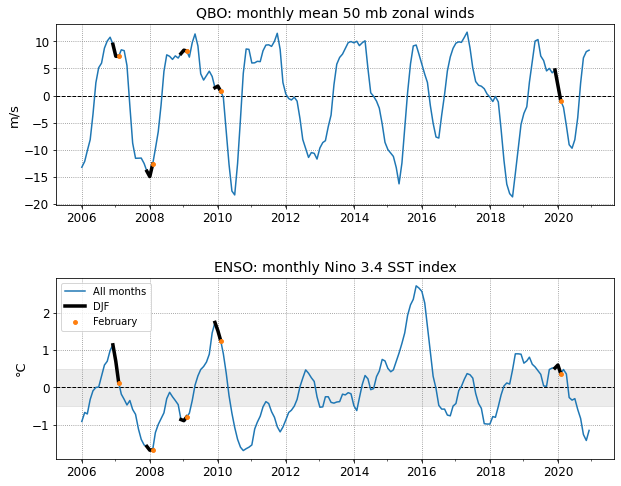

In [27]:
tsize = 14
fsize = 13
labsize = 12

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

for ax in [ax1, ax2]:
    ax.grid(True, color="gray", linestyle=":")
    ax.axhline(0, color="k", linestyle="--", linewidth=1)
    ax.tick_params(axis="both", labelsize=labsize)
    ax.xaxis.set_minor_locator(MultipleLocator(365))

ax2.axhspan(-0.5, 0.5, color="gray", alpha=0.15)#, label="+/- 0.5°C")

plot_all_highlight_djf(ax1, qbo50)
plot_all_highlight_djf(ax2, nina34)

ax1.set_title("QBO: monthly mean 50 mb zonal winds", fontsize=tsize)
ax2.set_title("ENSO: monthly Nino 3.4 SST index", fontsize=tsize)
ax1.set_ylabel("m/s", fontsize=fsize)
ax2.set_ylabel("°C", fontsize=fsize)

ax2.legend(loc="upper left")#, ncol=2)

plt.savefig(save_dir + "QBO_ENSO_indices_2006-2020.png", dpi=300, bbox_inches="tight")

plt.show()
